In [2]:
#importing dataset in colab


# from google.colab import files
# uploaded = files.upload()

#for colab

Saving seattle-weather.csv to seattle-weather.csv


In [2]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv('seattle-weather.csv')

In [4]:
df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [5]:
df.isnull()

,date,precipitation,temp_max,temp_min,wind,weather
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
1456,False,False,False,False,False,False
1457,False,False,False,False,False,False
1458,False,False,False,False,False,False
1459,False,False,False,False,False,False


In [6]:
df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [7]:
df.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [8]:
df = df.drop("date", axis='columns') #cleaning data

In [9]:
df

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,drizzle
1,10.9,10.6,2.8,4.5,rain
2,0.8,11.7,7.2,2.3,rain
3,20.3,12.2,5.6,4.7,rain
4,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...
1456,8.6,4.4,1.7,2.9,rain
1457,1.5,5.0,1.7,1.3,rain
1458,0.0,7.2,0.6,2.6,fog
1459,0.0,5.6,-1.0,3.4,sun


In [10]:
from sklearn.ensemble import RandomForestClassifier  
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [11]:
df = df.drop('weather', axis ='columns')

In [12]:
x = df.iloc[:,[0,1,2,3]].values

In [13]:
x

array([[ 0. , 12.8,  5. ,  4.7],
       [10.9, 10.6,  2.8,  4.5],
       [ 0.8, 11.7,  7.2,  2.3],
       ...,
       [ 0. ,  7.2,  0.6,  2.6],
       [ 0. ,  5.6, -1. ,  3.4],
       [ 0. ,  5.6, -2.1,  3.5]])

In [14]:
# Using wcss
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i,init = 'k-means++', random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

AttributeError: 'NoneType' object has no attribute 'split'

ValueError: x and y must have same first dimension, but have shapes (10,) and (0,)

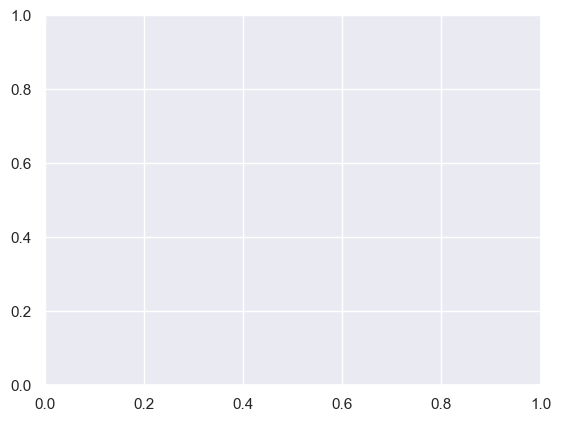

In [15]:
#plot elbow graph

sns.set()
plt.plot(range(1,11), wcss)
plt.title('Elbow point graph')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
plt.show()

In [16]:
#Optimum no. of cluster is 4

kmeans = KMeans(n_clusters = 5,init = 'k-means++', random_state = 0)

y = kmeans.fit_predict(x)

In [17]:
print(y)

[3 4 3 ... 0 0 0]


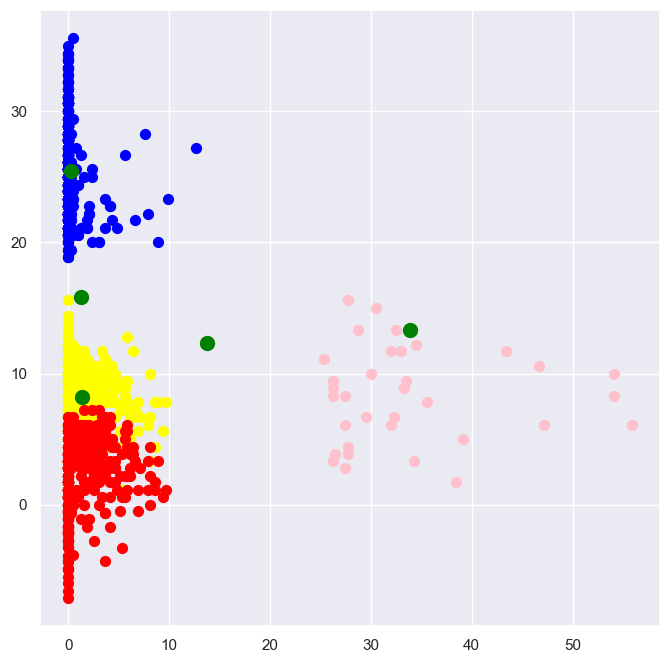

In [18]:
#scater plot
#visualiszing ploting
plt.figure(figsize = (8,8))
plt.scatter(x[y == 0,0], x[y == 0,1], s = 50, c= 'yellow', label ='C1')
plt.scatter(x[y == 1,0], x[y == 1,1], s = 50, c= 'blue', label ='C2')
plt.scatter(x[y == 0,0], x[y == 0,2], s = 50, c= 'red', label ='C3')
plt.scatter(x[y == 2,0], x[y == 2,2], s = 50, c= 'pink', label ='C4')


plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s= 100, c='green', label ='Centroid')
plt.show()

In [19]:
from sklearn.ensemble import RandomForestClassifier  
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")

In [20]:
precipitation = 15.2
temp_max =-1.1
temp_min= -2.8
wind = 1.6

# 0	19.4	9.4	3.5
#inputs


In [21]:
classifier.fit(x,y)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [22]:
ypred= classifier.predict(x)
ypred

array([3, 4, 3, ..., 0, 0, 0])

In [23]:
accuracy_score(y,ypred) #accuracy%

1.0

In [24]:
input = [[precipitation,temp_max,temp_min,wind]] #fiting input

In [25]:
def pred(input):
    pred=classifier.predict(input)
    if pred == 1:
      print('It Will Be Sunny Day')
    elif pred == 2:
      print('It will be Drizzle today ')
    elif pred == 4:
      print('It will be  Snow Today ')
    else:
      print('Its a Rainy Day')
    

In [26]:
pred(input)

It will be  Snow Today 


In [30]:
#for user input
import PySimpleGUI as sg

sg.theme('DarkPurple6')   # Add a touch of color
# All the stuff inside your window.
layout = [  [sg.Text('Enter Data')],
            [sg.Text('Precipitation'), sg.InputText()],
            [sg.Text('Maximum Temperature'), sg.InputText()],
            [sg.Text('Minimum Temperature'), sg.InputText()],
            [sg.Text('Wind'), sg.InputText()],
            [sg.Button('Ok'), sg.Button('Cancel')] ]
# current = values[0]
# voltage = values[1]
# temperature = values[2]
# humidity = values[3]
# vibration = values[4]
# Create the Window
window = sg.Window('Weather Forecasting', layout)
# Event Loop to process "events" and get the "values" of the inputs
while True:
    event, values = window.read()
    precipitation = values[0]
    temp_max = values[1]
    temp_min = values[2]
    wind = values[3]
    input = [[precipitation,temp_max,temp_min,wind]] #fiting input
    if event == sg.WIN_CLOSED or event == 'Cancel': # if user closes window or clicks cancel
        break
    print(pred(input))
    
    

window.close()

Its a Rainy Day
None
